# Eager sweep 9

Súbor: 9_1_eager_sweep_9.ipynb

Program: Hospodárska informatika

Vypracovala:  Veronika Motúzová 

Bakalárska práca: Metódy hlbokého učenia pre detekciu meteorov v astronomických snímkach

Vedúci bakalárskej práce: doc. Ing. Peter Butka, PhD.

Konzultant: Ing. Viera Maslej Krešňáková

https://wandb.ai/motuziik/model_optimization/runs/ukijl4yj

Import knižníc

In [33]:
# BLOK 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D,ZeroPadding2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import array
from sklearn.metrics import confusion_matrix, classification_report
import itertools 
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint 
from sklearn.model_selection import train_test_split

Načítanie a rozdelenie dát

In [34]:
# BLOK 2
train = np.load('../../data/zaloha-sdss/oct2019/data_final_train.npz')
test = np.load('../../data/zaloha-sdss/oct2019/data_final_test.npz')
x_train = train['train_data'].reshape(train['train_data'].shape[0], 128, 128, 1)
x_test = test['test_data'].reshape(test['test_data'].shape[0], 128, 128, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = to_categorical(train['train_targets'], 2)
y_test = to_categorical(test['test_targets'], 2)
X = np.concatenate([x_train,x_test])
Y = np.concatenate([y_train,y_test])
x_tr, x_test, y_tr, y_test = train_test_split(X,Y,test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, test_size=0.1)

In [35]:
# BLOK 3
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(38467, 128, 128, 1)
(4750, 128, 128, 1)
(4275, 128, 128, 1)
(38467, 2)
(4750, 2)
(4275, 2)


CNN

In [36]:
# BLOK 4
model = Sequential()

In [37]:
model.add(ZeroPadding2D((1,1),input_shape=(128, 128,1)))

In [38]:
model.add(Conv2D(64, 3, strides=1, activation='relu')) 

In [39]:
model.add(MaxPool2D(pool_size = 3, strides = 2))

In [40]:
model.add(Conv2D(64, 5, strides=1, padding='same', activation='relu'))

In [41]:
model.add(MaxPool2D(pool_size = 3, strides = 2))

In [42]:
model.add(Conv2D(64, 3, strides=1, padding='same', activation='relu'))

In [43]:
model.add(Conv2D(64, 3, strides=1, padding='same', activation='relu'))

In [44]:
model.add(MaxPool2D(pool_size = 3, strides = 2))

In [45]:
model.add(Flatten())

In [46]:
model.add(Dense(96, activation='relu'))

In [47]:
model.add(Dropout(0.15)) 

In [48]:
model.add(Dense(96, activation='relu'))

In [49]:
model.add(Dropout(0.15)) 

In [50]:
model.add(Dense(2, activation='softmax'))

RMSprop Optimization

In [51]:
# BLOK 5
optim = RMSprop()

In [52]:
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

Aby sa uložil model s najlepším výsledkom:

In [53]:
# BLOK 6
saved_model = "9_1_eager_sweep_9.hdf5"
checkpoint = ModelCheckpoint(saved_model, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [54]:
# BLOK 7
f = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint])

Epoch 1/20
301/301 [==============================] - ETA: 0s - loss: 0.3851 - accuracy: 0.8248
Epoch 00001: val_accuracy improved from -inf to 0.90994, saving model to 9_1_eager_sweep_9.hdf5
301/301 [==============================] - 64s 211ms/step - loss: 0.3851 - accuracy: 0.8248 - val_loss: 0.2435 - val_accuracy: 0.9099
Epoch 2/20
301/301 [==============================] - ETA: 0s - loss: 0.2623 - accuracy: 0.9278
Epoch 00002: val_accuracy did not improve from 0.90994
301/301 [==============================] - 62s 206ms/step - loss: 0.2623 - accuracy: 0.9278 - val_loss: 0.2517 - val_accuracy: 0.8858
Epoch 3/20
301/301 [==============================] - ETA: 0s - loss: 0.1504 - accuracy: 0.9536
Epoch 00003: val_accuracy improved from 0.90994 to 0.95626, saving model to 9_1_eager_sweep_9.hdf5
301/301 [==============================] - 62s 207ms/step - loss: 0.1504 - accuracy: 0.9536 - val_loss: 0.1478 - val_accuracy: 0.9563
Epoch 4/20
301/301 [==============================] - ETA: 0

Načítanie modelu

In [55]:
# BLOK 8
print("Loading model....")
model = load_model('9_1_eager_sweep_9.hdf5')

Loading model....


Vyhodnotenie test loss a accuracy

In [56]:
#na trénovacej množine 
score = model.evaluate(x_train, y_train, verbose=0) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.022698169574141502
Test accuracy: 0.9933449625968933


In [57]:
# BLOK 9
#na testovacej množine
score1 = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.12919846177101135
Test accuracy: 0.9831578731536865


Predikcia

In [59]:
# BLOK 10
y_pred = model.predict(x_test)
prediction_int = np.zeros_like(y_pred)
prediction_int[y_pred > 0.5] = 1

Confusion Matrix

In [60]:
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [61]:
# TN / FN
# FP / TP
print(matrix)

[[2362   22]
 [  58 2308]]


In [62]:
print(classification_report(y_test, prediction_int))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2384
           1       0.99      0.98      0.98      2366

   micro avg       0.98      0.98      0.98      4750
   macro avg       0.98      0.98      0.98      4750
weighted avg       0.98      0.98      0.98      4750
 samples avg       0.98      0.98      0.98      4750



In [58]:
# BLOK 11
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 130, 130, 1)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 63, 63, 64)        102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 31, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 31, 31, 64)       

Graf modelu

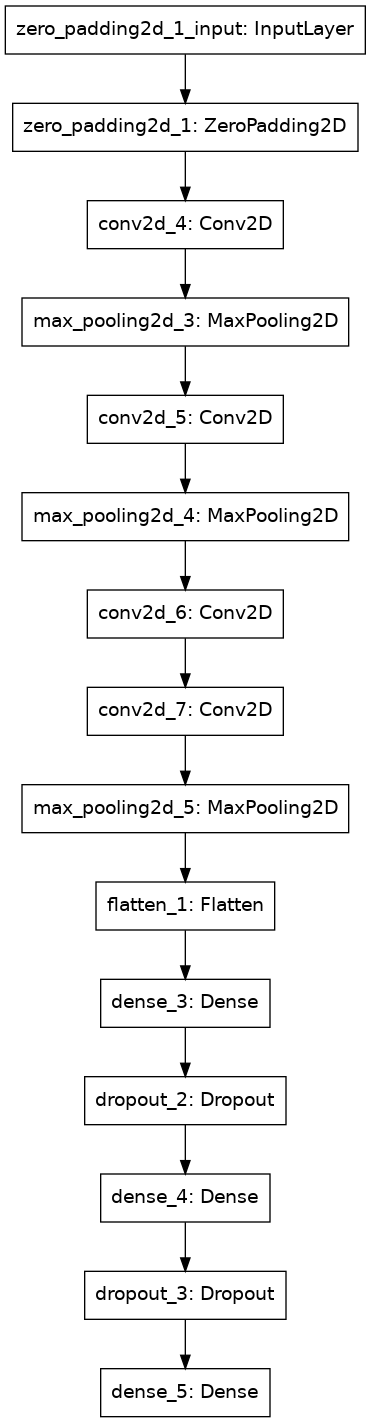

In [63]:
# BLOK 12
tf.keras.utils.plot_model(model, "9_1_eager_sweep_9.png")

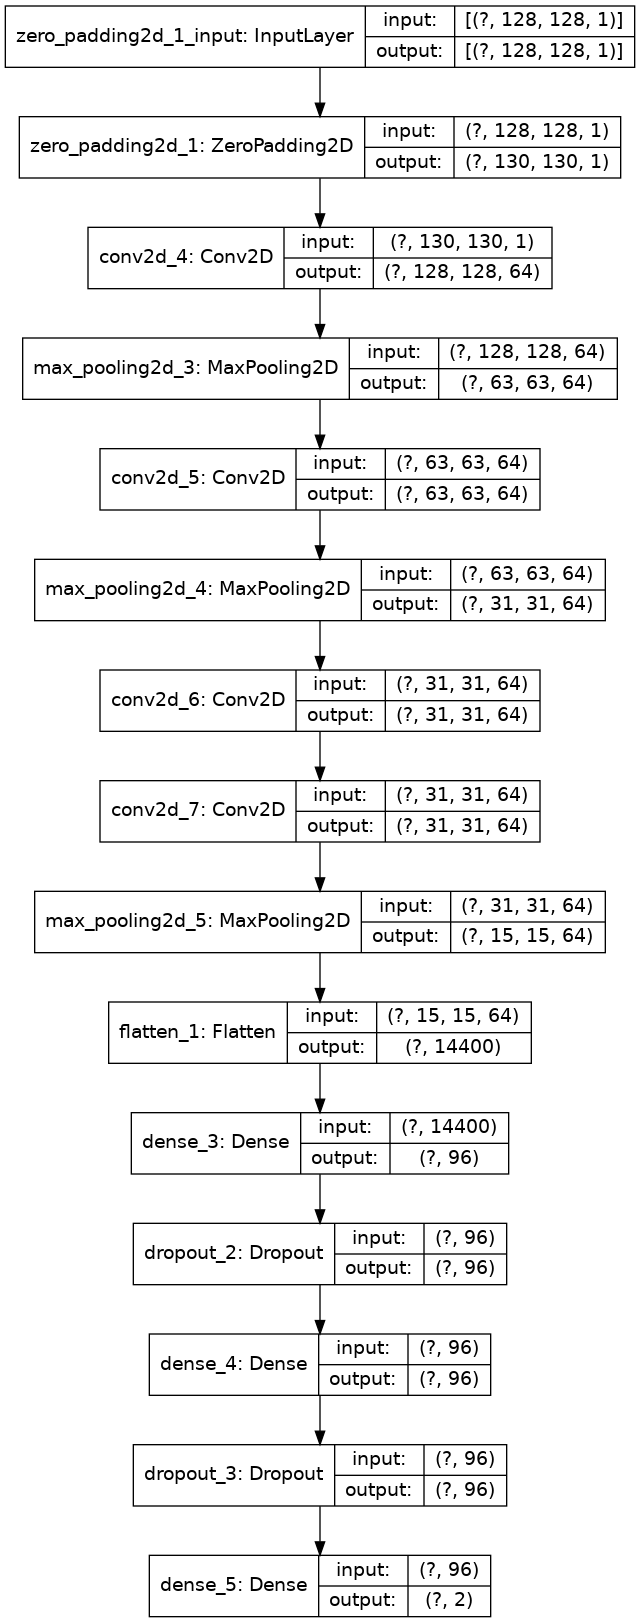

In [64]:
tf.keras.utils.plot_model(model, to_file='9_1_eager_sweep_9_shapes.png', show_shapes=True)

In [1]:
conda install -c anaconda graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.0
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    atk-1.0-2.36.0             |       h3371d22_4         560 KB  conda-forge
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    cairo-1.16.0               |    h6cf1ce9_1008         1.5 MB  conda-forge
    certifi-2020.6.20          |           py38_0         160 KB  anaconda
    cffi-1.14.3                |   py38he30daa8_0         226 KB  anaconda
    expat-2.3.0                |       h9c3ff4c_0         168 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       h6964260_0         386 KB  anaconda
    font-ttf-inconsolata

In [2]:
conda install -c conda-forge pydot

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.0
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pydot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    certifi-2020.12.5          |   py38h578d9bd_1         143 KB  conda-forge
    openssl-1.1.1k             |       h7f98852_0         2.1 MB  conda-forge
    pydot-1.4.2                |   py38h578d9bd_0          42 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  pydot              conda-forge/linux-64::pydot-1.4.2-py38h578d9bd_0

The

In [3]:
conda install -c conda-forge pydotplus

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.0
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |     pyh243d235_4          24 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          24 KB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-pyh243d235_4



pydotplus-2.0.2      | 24 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.